## <center>**DSBDA Mini Project 2021-22**
---
## <center>Breat Cancer Prediction
---


## <center>**Isha Kanade**
## <center>**Manasi Hatekar**
## <center>**Koushal Mahajan**


---

## <b>Result Site


---

## <b>Dataset

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## Preparing Dataset

In [1]:
#importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing dataset
df = pd.read_csv('breast_cancer_dataset.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

## **Preparing Data** & **EDA**

In [3]:
print('Data Shape',df.shape)

Data Shape (569, 33)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**As in the column Unnamed:32, there are 569 missing entries so we will drop the column unnamed:32.**

**Also replacing M with 1 and B with 0.**

In [7]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [8]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
#Change Diagnosis to be last column
df['target'] = df['diagnosis'].copy()
df.drop(['diagnosis'],axis = 1,inplace = True)
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  target  
0          0.4601                  0.11890       1  
1          0.2750                  0.08902       1  
2          0.3613                  0.08758       1  
3          0.6638                  0.17300       1  
4          0.2364                  0.07678       1  

[5 rows x 31 columns]

In [9]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

In [10]:
Y = df.target
X = df.drop(['target'], axis=1)
X.shape

(569, 30)

### **VISUALIZATION**

Benign:  357
Malignant :  212


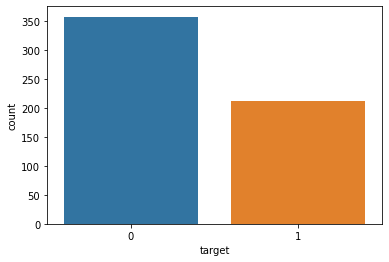

In [11]:
sns.countplot(df['target'], label='Count')

B, M = df['target'].value_counts()
print('Benign: ',B)
print('Malignant : ',M)

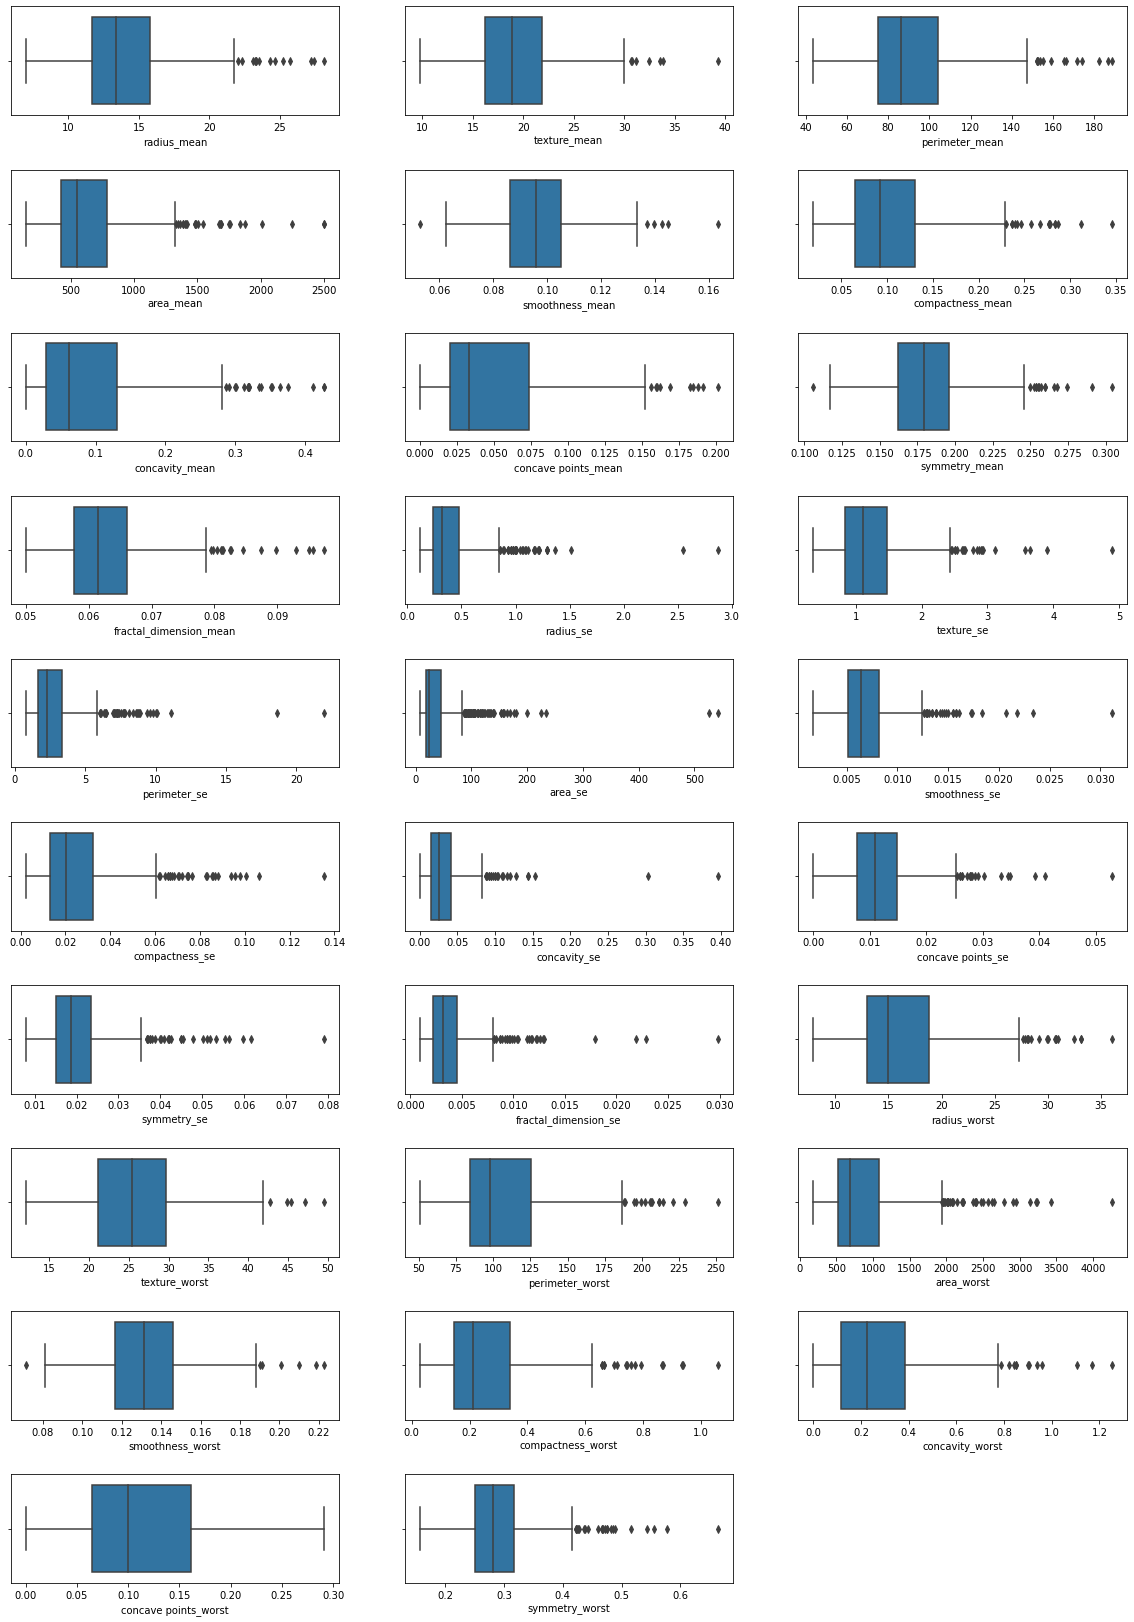

In [12]:
plt.figure(figsize =(20,32))
n = 0
for i in list(X.iloc[:,:-1].columns):
        n += 1
        plt.subplot(11,3,n)
        plt.subplots_adjust(hspace = 0.5,wspace = 0.2)
        sns.boxplot(x=df[i])
plt.show()

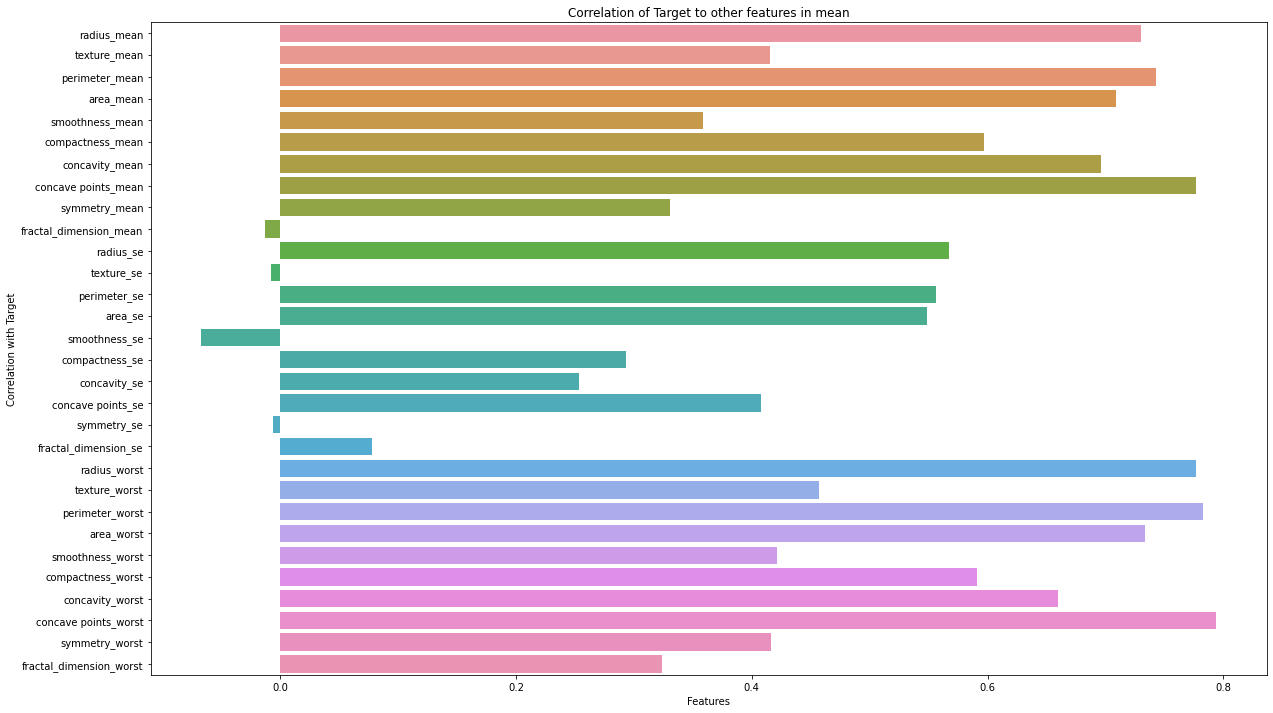

In [13]:
corr = df.corr()

corr_target = (df[df.columns[0:]].corr()['target'][:-1]).to_frame()
plt.figure(1,figsize =(20,12))
sns.barplot(y = corr_target.index,x = corr_target['target'],data = corr_target, orient = "h")
plt.title('Correlation of Target to other features in mean')
plt.ylabel('Correlation with Target')
plt.xlabel('Features')
plt.show()

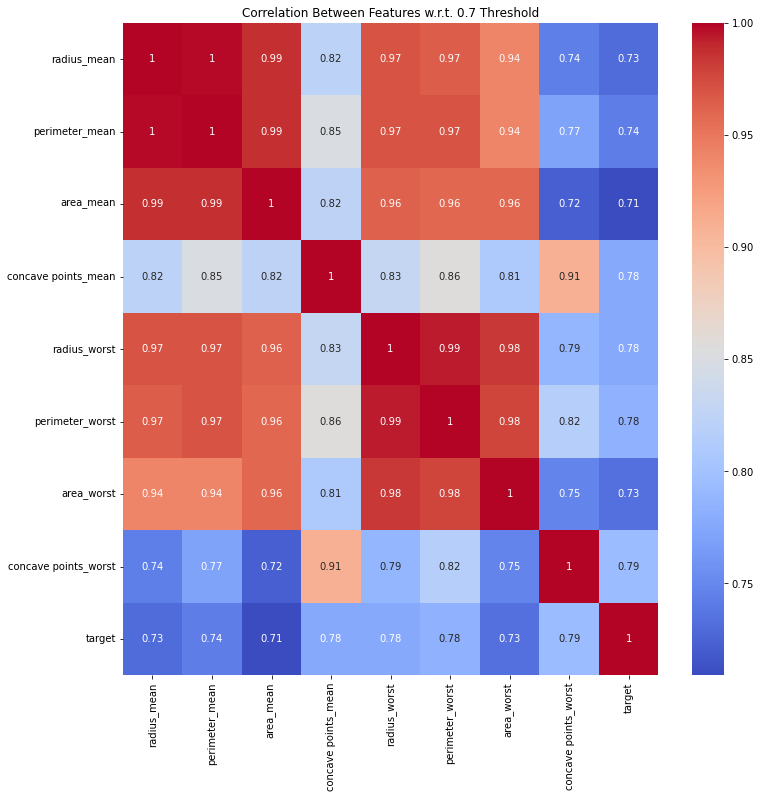

In [14]:
plt.figure(figsize = (12,12))
thresh = 0.7
mask = np.abs(corr["target"]) > thresh
heavy_features = corr.columns[mask].tolist()
sns.heatmap(df[heavy_features].corr(),annot=True,cmap = 'coolwarm');
plt.title("Correlation Between Features w.r.t. 0.7 Threshold");
plt.show();

In [15]:
print('Features that heavily influence target are: ', heavy_features)

Features that heavily influence target are:  ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'target']


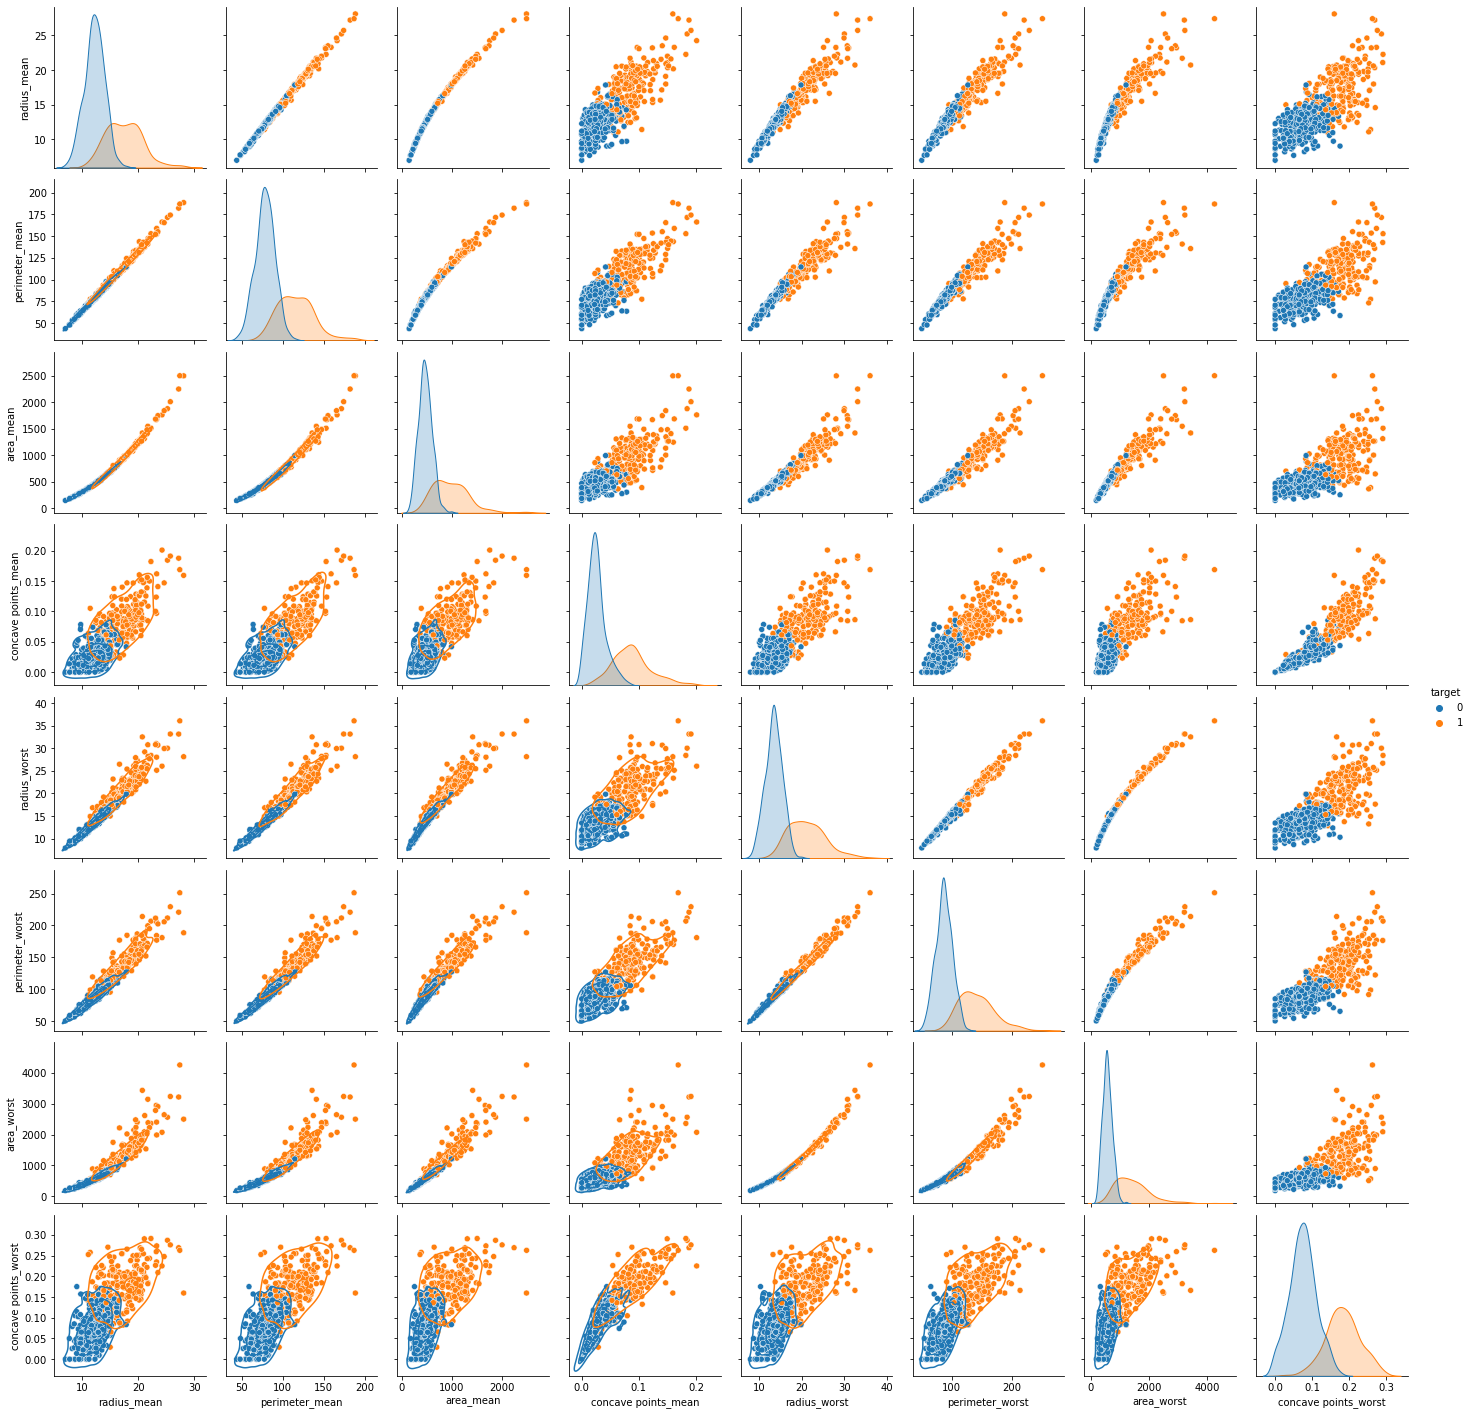

In [16]:
gr = sns.pairplot(df.loc[:,heavy_features],hue = 'target',diag_kind="kde")
gr.map_lower(sns.kdeplot, levels=4, color=".2")

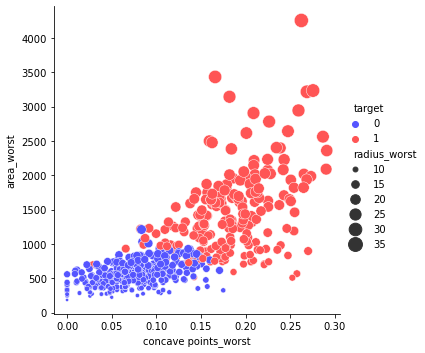

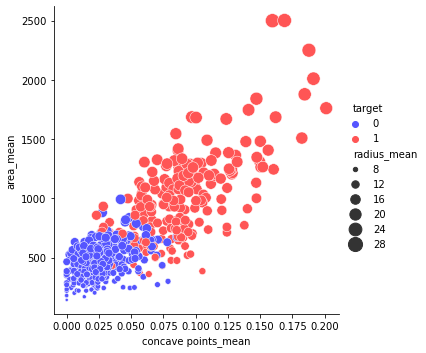

In [17]:
sns.relplot(data=df.loc[:,heavy_features],x="concave points_worst", y="area_worst",
    hue="target", size="radius_worst",
    palette='seismic', sizes=(10,200))
sns.relplot(data=df.loc[:,heavy_features],x="concave points_mean", y="area_mean",
    hue="target", size="radius_mean",
    palette='seismic', sizes=(10,200))
plt.show()

# **MODEL BUILDING**

MODELS USED:
1.   Random Forest
2. Decision Tree
3. Logistic Regression
4. SVM
5. K Nearest neighbour

In [18]:
#importing necessary model libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
import itertools

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier

import plotly.graph_objects as go

In [19]:
#test-train split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 7)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


## Random Forest Classifier

In [20]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
yhat_rf = clf_rf.predict(X_test)
yhat_proba_rf = clf_rf.predict_proba(X_test)

ac_rf = accuracy_score(y_test, yhat_rf)
print('Accuracy Score: ', ac_rf)

Accuracy Score:  0.9824561403508771


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

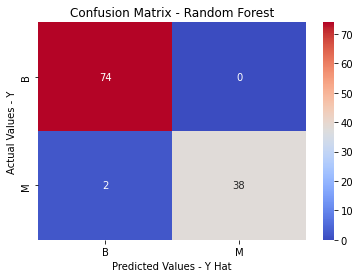

In [21]:
cm_rf = confusion_matrix(y_test, yhat_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='coolwarm', xticklabels='BM', yticklabels='BM')
plt.xlabel('Predicted Values - Y Hat')
plt.ylabel('Actual Values - Y')
plt.title('Confusion Matrix - Random Forest')

In [22]:
f1_rf = f1_score(y_test, yhat_rf, average='weighted') 
print('F1 Score: ', f1_rf)

F1 Score:  0.9823481781376517


## Decision Tree

In [23]:
clf_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clf_dt.fit(X_train, y_train)
yhat_dt = clf_dt.predict(X_test)
yhat_proba_dt = clf_dt.predict_proba(X_test)

metrics.accuracy_score(yhat_dt, y_test)
ac_dt = metrics.accuracy_score(yhat_dt, y_test)
print("DecisionTrees's Accuracy: ", ac_dt)

DecisionTrees's Accuracy:  0.956140350877193


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

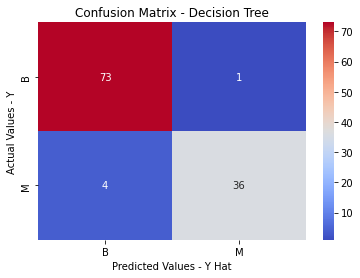

In [24]:
cm_dt = confusion_matrix(y_test, yhat_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm', xticklabels='BM', yticklabels='BM')
plt.xlabel('Predicted Values - Y Hat')
plt.ylabel('Actual Values - Y')
plt.title('Confusion Matrix - Decision Tree')

In [25]:
f1_dt = f1_score(y_test, yhat_dt, average='weighted') 
print('F1 Score: ', f1_dt)

F1 Score:  0.9557216340067508


## Logistic Regression

In [26]:
clf_lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
clf_lr

LogisticRegression(C=0.01, solver='liblinear')

In [27]:
clf_lr.fit(X_train, y_train)
yhat_lr = clf_lr.predict(X_test)
yhat_proba_lr = clf_lr.predict_proba(X_test)

ac_lr = accuracy_score(y_test, yhat_lr)
print('Accuracy Score: ', ac_lr)

Accuracy Score:  0.9298245614035088


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

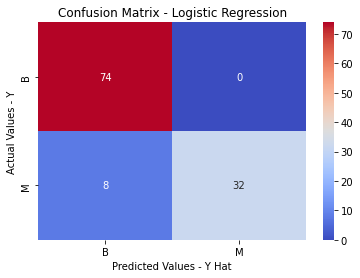

In [28]:
cm_lr = confusion_matrix(y_test, yhat_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='coolwarm', xticklabels='BM', yticklabels='BM')
plt.xlabel('Predicted Values - Y Hat')
plt.ylabel('Actual Values - Y')
plt.title('Confusion Matrix - Logistic Regression')

In [29]:
f1_lr = f1_score(y_test, yhat_lr, average='weighted') 
print('F1 Score: ', f1_lr)

F1 Score:  0.9277252961463488


In [30]:
print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        74
           1       1.00      0.80      0.89        40

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



## SVM

In [31]:
clf_svm = svm.SVC(kernel='rbf', probability=True)
clf_svm.fit(X_train, y_train)
yhat_svm = clf_svm.predict(X_test)
yhat_proba_svm = clf_svm.predict_proba(X_test)

ac_svm = accuracy_score(y_test, yhat_svm)
print('Accuracy Score: ', ac_svm)

Accuracy Score:  0.9035087719298246


Text(0.5, 1.0, 'Confusion Matrix - Support Vector Machine')

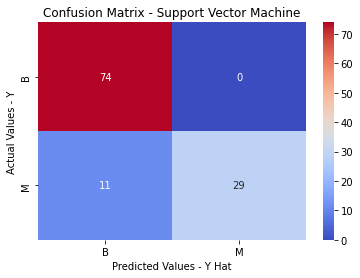

In [32]:
cm_svm = confusion_matrix(y_test, yhat_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='coolwarm', xticklabels='BM', yticklabels='BM')
plt.xlabel('Predicted Values - Y Hat')
plt.ylabel('Actual Values - Y')
plt.title('Confusion Matrix - Support Vector Machine')

In [33]:
f1_svm = f1_score(y_test, yhat_svm, average='weighted')
print('F1 Score: ', f1_svm)

F1 Score:  0.8991551890390455


## K - nearest neighbour

In [34]:
k = 7
clf_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = clf_knn.predict(X_test)
yhat_proba_knn = clf_knn.predict_proba(X_test)

ac_knn = metrics.accuracy_score(y_test, yhat_knn)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf_knn.predict(X_train)))
print("Test set Accuracy: ", ac_knn)

Train set Accuracy:  0.9406593406593406
Test set Accuracy:  0.9385964912280702


In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
# ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    clf_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn=clf_knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.92105263, 0.9122807 , 0.9122807 , 0.9122807 , 0.92982456,
       0.92982456, 0.93859649, 0.92982456, 0.92982456])

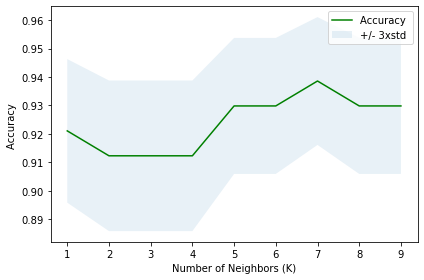

In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

The best accuracy was with 0.9385964912280702 with k = 7


Text(0.5, 1.0, 'Confusion Matrix - K Nearest Neighbors')

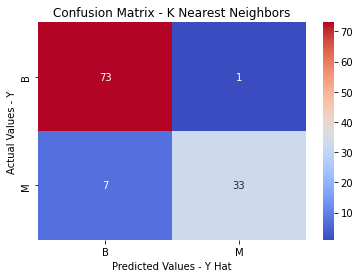

In [37]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

cm_knn = confusion_matrix(y_test, yhat_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels='BM', yticklabels='BM')
plt.xlabel('Predicted Values - Y Hat')
plt.ylabel('Actual Values - Y')
plt.title('Confusion Matrix - K Nearest Neighbors')

In [38]:
f1_knn = f1_score(y_test, yhat_knn, average='weighted') 
print('F1 Score: ', f1_knn)

F1 Score:  0.9283466651887704


# **Comparing Results**

In [39]:
models_n = {'Algorithm' : ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbor'],
     'Accuracy_Score' : [ac_rf, ac_dt, ac_lr, ac_svm, ac_knn],
    'F1_Score' : [f1_rf, f1_dt, f1_lr, f1_svm, f1_knn]}
df_accuracy = pd.DataFrame(data=models_n)
df_accuracy

Algorithm  Accuracy_Score  F1_Score
0           Random Forest        0.982456  0.982348
1           Decision Tree        0.956140  0.955722
2     Logistic Regression        0.929825  0.927725
3  Support Vector Machine        0.903509  0.899155
4      K Nearest Neighbor        0.938596  0.928347

In [40]:
# CREATE BAR CHART TO VISUALIZE EACH ALGORITHM'S ACCURACY MEASUREMENT. 

fig = go.Figure(data=[go.Bar(name='Accuracy_Score', x=df_accuracy['Algorithm'], y=df_accuracy['Accuracy_Score']),
                      go.Bar(name='F1_Score', x=df_accuracy['Algorithm'], y=df_accuracy['F1_Score']),
                     ])

# Change the bar mode
fig.update_layout(barmode='group', title_text='Classification Scores')
fig.show()

### **The best model is Random Forest with a accuracy score of 0.9736 and F1 score of 0.9735.**

In [41]:
#saving model to the user system
pickle.dump(clf_rf, open('bc_model.pkl','wb'))
#loading the model
bc_model = pickle.load(open('bc_model.pkl','rb'))

In [42]:
# checking the working of model onexample values.
print(bc_model.predict([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,
]]))

[1]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

